<a href="https://colab.research.google.com/github/AnthonyBurton-Cordova/SLADA_Project/blob/main/SLADA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [ ]:
# Set view options for info() and head()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
# Import data (We need to establish a Database and call that. The excel file is too big.)
data = pd.read_csv(r"/content/SLADA_Project/Data_Sets/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/SLADA_Project/Data_Sets/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv'

# Exploritory Data Analysis



### Getting to know the data

In [ ]:
# check the first rows of data
data.head()

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0       443         6  02/03/2018 08:47:38         141385             9   
1     49684         6  02/03/2018 08:47:38            281             2   
2       443         6  02/03/2018 08:47:40         279824            11   
3       443         6  02/03/2018 08:47:40            132             2   
4       443         6  02/03/2018 08:47:41         274016             9   

   Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0             7              553           3773.0              202   
1             1               38              0.0               38   
2            15             1086          10527.0              385   
3             0                0              0.0                0   
4            13             1285           6141.0              517   

   Fwd Pkt Len Min  Fwd Pkt Len Mean  Fwd Pkt Len Std  Bwd Pkt Len Max  \
0                0         61.444444        87.534438             1460   
1                0         19.000000        26.870058                0   
2                0         98.727273       129.392497             1460   
3                0          0.000000         0.000000                0   
4                0        142.777778       183.887722             1460   

   Bwd Pkt Len Min  Bwd Pkt Len Mean  Bwd Pkt Len Std   Flow Byts/s  \
0                0        539.000000       655.432936   30597.30523   
1                0          0.000000         0.000000  135231.31670   
2                0        701.800000       636.314186   41501.08640   
3                0          0.000000         0.000000       0.00000   
4                0        472.384615       611.180489   27100.60726   

    Flow Pkts/s  Flow IAT Mean  Flow IAT Std  Flow IAT Max  Flow IAT Min  \
0    113.166178    9425.666667  19069.116850       73403.0           1.0   
1  10676.156580     140.500000    174.655375         264.0          17.0   
2     92.915547   11192.960000  24379.448340      112589.0           1.0   
3  15151.515150     132.000000      0.000000         132.0         132.0   
4     80.287282   13048.380950  26311.627030      114077.0           1.0   

   Fwd IAT Tot  Fwd IAT Mean  Fwd IAT Std  Fwd IAT Max  Fwd IAT Min  \
0     141385.0     17673.125  23965.32327      73403.0         22.0   
1        281.0       281.000      0.00000        281.0        281.0   
2     279728.0     27972.800  36167.74032     112589.0         94.0   
3        132.0       132.000      0.00000        132.0        132.0   
4     273946.0     34243.250  37996.56546     114077.0        201.0   

   Bwd IAT Tot  Bwd IAT Mean  Bwd IAT Std  Bwd IAT Max  Bwd IAT Min  \
0      51417.0    8569.50000  13036.89082      31525.0          1.0   
1          0.0       0.00000      0.00000          0.0          0.0   
2     258924.0   18494.57143  36356.50372     133669.0          1.0   
3          0.0       0.00000      0.00000          0.0          0.0   
4     252994.0   21082.83333  39075.73819     135611.0          1.0   

   Fwd PSH Flags  Bwd PSH Flags  Fwd URG Flags  Bwd URG Flags  Fwd Header Len  \
0              0              0              0              0             192   
1              1              0              0              0              40   
2              0              0              0              0             232   
3              0              0              0              0              40   
4              0              0              0              0             192   

   Bwd Header Len    Fwd Pkts/s   Bwd Pkts/s  Pkt Len Min  Pkt Len Max  \
0             152     63.655975    49.510203            0         1460   
1              20   7117.437722  3558.718861            0           38   
2             312     39.310424    53.605123            0         1460   
3               0  15151.515150     0.000000            0            0   
4             272     32.844797    47.442485            0         1460   

   Pkt Len Mean 

In [ ]:
# check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  float64
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [ ]:
# count of missing values per column
data.isnull().sum()

Dst Port               0
Protocol               0
Timestamp              0
Flow Duration          0
Tot Fwd Pkts           0
Tot Bwd Pkts           0
TotLen Fwd Pkts        0
TotLen Bwd Pkts        0
Fwd Pkt Len Max        0
Fwd Pkt Len Min        0
Fwd Pkt Len Mean       0
Fwd Pkt Len Std        0
Bwd Pkt Len Max        0
Bwd Pkt Len Min        0
Bwd Pkt Len Mean       0
Bwd Pkt Len Std        0
Flow Byts/s          175
Flow Pkts/s            0
Flow IAT Mean          0
Flow IAT Std           0
Flow IAT Max           0
Flow IAT Min           0
Fwd IAT Tot            0
Fwd IAT Mean           0
Fwd IAT Std            0
Fwd IAT Max            0
Fwd IAT Min            0
Bwd IAT Tot            0
Bwd IAT Mean           0
Bwd IAT Std            0
Bwd IAT Max            0
Bwd IAT Min            0
Fwd PSH Flags          0
Bwd PSH Flags          0
Fwd URG Flags          0
Bwd URG Flags          0
Fwd Header Len         0
Bwd Header Len         0
Fwd Pkts/s             0
Bwd Pkts/s             0


In [ ]:
# Count NaNs in each column
nan_count_per_column = data.isna().sum()
print("NaNs per column:\n", nan_count_per_column)

NaNs per column:
 Dst Port                0
Protocol                0
Timestamp               0
Flow Duration           0
Tot Fwd Pkts            0
Tot Bwd Pkts            0
TotLen Fwd Pkts         0
TotLen Bwd Pkts         0
Fwd Pkt Len Max         0
Fwd Pkt Len Min         0
Fwd Pkt Len Mean        0
Fwd Pkt Len Std         0
Bwd Pkt Len Max         0
Bwd Pkt Len Min         0
Bwd Pkt Len Mean        0
Bwd Pkt Len Std         0
Flow Byts/s          2558
Flow Pkts/s             0
Flow IAT Mean           0
Flow IAT Std            0
Flow IAT Max            0
Flow IAT Min            0
Fwd IAT Tot             0
Fwd IAT Mean            0
Fwd IAT Std             0
Fwd IAT Max             0
Fwd IAT Min             0
Bwd IAT Tot             0
Bwd IAT Mean            0
Bwd IAT Std             0
Bwd IAT Max             0
Bwd IAT Min             0
Fwd PSH Flags           0
Bwd PSH Flags           0
Fwd URG Flags           0
Bwd URG Flags           0
Fwd Header Len          0
Bwd Header Len      

In [ ]:
# Count of unique values in each column
data.nunique()

Dst Port              37304
Protocol                  3
Timestamp             31425
Flow Duration        442344
Tot Fwd Pkts            754
Tot Bwd Pkts           1064
TotLen Fwd Pkts        6266
TotLen Bwd Pkts       18066
Fwd Pkt Len Max        1424
Fwd Pkt Len Min         184
Fwd Pkt Len Mean      20086
Fwd Pkt Len Std       33062
Bwd Pkt Len Max         993
Bwd Pkt Len Min         287
Bwd Pkt Len Mean      29443
Bwd Pkt Len Std       34946
Flow Byts/s          458104
Flow Pkts/s          455755
Flow IAT Mean        400220
Flow IAT Std         524747
Flow IAT Max         195722
Flow IAT Min          44058
Fwd IAT Tot          280941
Fwd IAT Mean         351690
Fwd IAT Std          314718
Fwd IAT Max          253282
Fwd IAT Min           76576
Bwd IAT Tot          251488
Bwd IAT Mean         316792
Bwd IAT Std          427831
Bwd IAT Max          153810
Bwd IAT Min          135436
Fwd PSH Flags             2
Bwd PSH Flags             1
Fwd URG Flags             1
Bwd URG Flags       

In [ ]:
# Find and Print the columns with a single value. Aka, columns which have no predictive value.
columns_with_one_unique_value = [col for col in data.columns if data[col].nunique() == 1]
print(columns_with_one_unique_value)

['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg']


In [ ]:
# Drop those columns
data2 = data.drop(columns_with_one_unique_value, axis=1)

In [ ]:
# Drop timestamp and Flow Byts/s (for the NaNs), and Flow Pkts/s (for inf values) for now
data2 = data2.drop(['Timestamp', "Flow Byts/s", "Flow Pkts/s"], axis=1)

In [ ]:
# Count of unique values in each column
data2.nunique()

Dst Port              37304
Protocol                  3
Flow Duration        442344
Tot Fwd Pkts            754
Tot Bwd Pkts           1064
TotLen Fwd Pkts        6266
TotLen Bwd Pkts       18066
Fwd Pkt Len Max        1424
Fwd Pkt Len Min         184
Fwd Pkt Len Mean      20086
Fwd Pkt Len Std       33062
Bwd Pkt Len Max         993
Bwd Pkt Len Min         287
Bwd Pkt Len Mean      29443
Bwd Pkt Len Std       34946
Flow IAT Mean        400220
Flow IAT Std         524747
Flow IAT Max         195722
Flow IAT Min          44058
Fwd IAT Tot          280941
Fwd IAT Mean         351690
Fwd IAT Std          314718
Fwd IAT Max          253282
Fwd IAT Min           76576
Bwd IAT Tot          251488
Bwd IAT Mean         316792
Bwd IAT Std          427831
Bwd IAT Max          153810
Bwd IAT Min          135436
Fwd PSH Flags             2
Fwd Header Len         1419
Bwd Header Len         1976
Fwd Pkts/s           453048
Bwd Pkts/s           381426
Pkt Len Min              95
Pkt Len Max         

In [ ]:
# Convert Data Types
data2 = data2.convert_dtypes()

In [ ]:
# check the data types
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 68 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Flow Duration      1048575 non-null  int64  
 3   Tot Fwd Pkts       1048575 non-null  int64  
 4   Tot Bwd Pkts       1048575 non-null  int64  
 5   TotLen Fwd Pkts    1048575 non-null  int64  
 6   TotLen Bwd Pkts    1048575 non-null  float64
 7   Fwd Pkt Len Max    1048575 non-null  int64  
 8   Fwd Pkt Len Min    1048575 non-null  int64  
 9   Fwd Pkt Len Mean   1048575 non-null  float64
 10  Fwd Pkt Len Std    1048575 non-null  float64
 11  Bwd Pkt Len Max    1048575 non-null  int64  
 12  Bwd Pkt Len Min    1048575 non-null  int64  
 13  Bwd Pkt Len Mean   1048575 non-null  float64
 14  Bwd Pkt Len Std    1048575 non-null  float64
 15  Flow Pkts/s        1048575 non-n

In [ ]:
# Summary stats of the data
data2.describe()

Dst Port      Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
count  1.048575e+06  1.048575e+06   1.048575e+06  1.048575e+06  1.048575e+06   
mean   8.423429e+03  8.049848e+00   1.151421e+07  5.887282e+00  6.983180e+00   
std    1.516176e+04  4.432629e+00   3.012113e+07  8.903317e+01  2.129580e+02   
min    0.000000e+00  0.000000e+00   0.000000e+00  1.000000e+00  0.000000e+00   
25%    8.000000e+01  6.000000e+00   5.160000e+02  2.000000e+00  0.000000e+00   
50%    3.389000e+03  6.000000e+00   1.124200e+04  3.000000e+00  1.000000e+00   
75%    8.080000e+03  6.000000e+00   2.210150e+06  7.000000e+00  5.000000e+00   
max    6.553400e+04  1.700000e+01   1.200000e+08  4.315900e+04  6.924100e+04   

       TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
count     1.048575e+06     1.048575e+06     1.048575e+06     1.048575e+06   
mean      3.920838e+02     5.271275e+03     2.104312e+02     8.249200e+00   
std       2.159779e+03     3.088768e+05     2.669497e+02     2.094972e+01   
min       0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00   
25%       0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00   
50%       6.300000e+01     1.290000e+02     4.600000e+01     0.000000e+00   
75%       3.650000e+02     5.820000e+02     3.260000e+02     0.000000e+00   
max       1.100627e+06     1.010000e+08     1.711000e+03     1.460000e+03   

       Fwd Pkt Len Mean  Fwd Pkt Len Std  Bwd Pkt Len Max  Bwd Pkt Len Min  \
count      1.048575e+06     1.048575e+06     1.048575e+06     1.048575e+06   
mean       5.461640e+01     7.796052e+01     3.471215e+02     1.941831e+01   
std        5.762840e+01     9.693329e+01     5.037283e+02     4.546382e+01   
min        0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00   
25%        0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00   
50%        4.000000e+01     0.000000e+00     1.120000e+02     0.000000e+00   
75%        1.086667e+02     1.882162e+02     4.880000e+02     0.000000e+00   
max        1.460000e+03     1.032376e+03     1.460000e+03     1.430000e+03   

       Bwd Pkt Len Mean  Bwd Pkt Len Std   Flow Byts/s   Flow Pkts/s  \
count      1.048575e+06     1.048575e+06  1.046017e+06  1.048575e+06   
mean       1.027967e+02     1.257108e+02           inf           inf   
std        1.660129e+02     1.948650e+02           NaN           NaN   
min        0.000000e+00     0.000000e+00  0.000000e+00  1.666940e-02   
25%        0.000000e+00     0.000000e+00  0.000000e+00  6.795945e+00   
50%        3.225000e+01     0.000000e+00  1.058917e+03  6.191403e+02   
75%        1.630000e+02     2.305168e+02  4.161332e+04  4.024145e+03   
max        1.459620e+03     1.032376e+03           inf           inf   

       Flow IAT Mean  Flow IAT Std  Flow IAT Max  Flow IAT Min   Fwd IAT Tot  \
count   1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean    4.259832e+06  7.077308e+05  6.325742e+06  3.939930e+06  1.124203e+07   
std     1.677536e+07  2.973323e+06  1.896529e+07  1.678172e+07  3.000494e+07   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     4.950000e+02  0.000000e+00  5.000000e+02  1.100000e+01  1.730000e+02   
50%     1.913500e+03  8.697413e+02  1.028300e+04  6.300000e+01  6.060000e+02   
75%     1.589020e+05  2.395748e+05  9.531650e+05  5.050000e+02  1.842792e+06   
max     1.200000e+08  8.450000e+07  1.200000e+08  1.200000e+08  1.200000e+08   

       Fwd IAT Mean   Fwd IAT Std   Fwd IAT Max   Fwd IAT Min   Bwd IAT Tot  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   4.497207e+06  7.676435e+05  6.149988e+06  4.019518e+06  6.282781e+06   
std    1.684778e+07  3.374035e+06  1.882771e+07  1.685478e+07  2.349011e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.460000e+02  0.000000e+00  1.660000e+02  3.000000e+00  0.000000e+00   
50%    5.130000e+02  2.687006e+01  5.610000e+02  

In [ ]:
# Encode the Label variable
data2['Label'] = pd.Categorical(data2['Label']).codes

In [ ]:
# check the data type of Label
data2.info(["Label"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 69 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Flow Duration      1048575 non-null  int64  
 3   Tot Fwd Pkts       1048575 non-null  int64  
 4   Tot Bwd Pkts       1048575 non-null  int64  
 5   TotLen Fwd Pkts    1048575 non-null  int64  
 6   TotLen Bwd Pkts    1048575 non-null  float64
 7   Fwd Pkt Len Max    1048575 non-null  int64  
 8   Fwd Pkt Len Min    1048575 non-null  int64  
 9   Fwd Pkt Len Mean   1048575 non-null  float64
 10  Fwd Pkt Len Std    1048575 non-null  float64
 11  Bwd Pkt Len Max    1048575 non-null  int64  
 12  Bwd Pkt Len Min    1048575 non-null  int64  
 13  Bwd Pkt Len Mean   1048575 non-null  float64
 14  Bwd Pkt Len Std    1048575 non-null  float64
 15  Flow Byts/s        1046017 non-n

**Univariate Analysis**
* Histogram
* KDE
* Boxplot

In [ ]:
# Columns
data2.columns

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Siz

In [ ]:
# Get value counts for each column individually
# Too many to run, need to do invidually if necessary

"""for col in ['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Label']:
    print(data2[col].value_counts()[:1000])"""

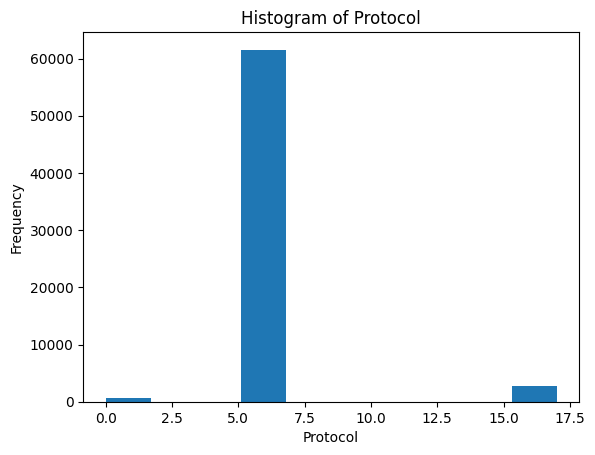

In [ ]:
# Histogram of Protocol
plt.hist(data2['Protocol'])
plt.title('Histogram of Protocol')
plt.xlabel('Protocol')
plt.ylabel('Frequency')
plt.show()

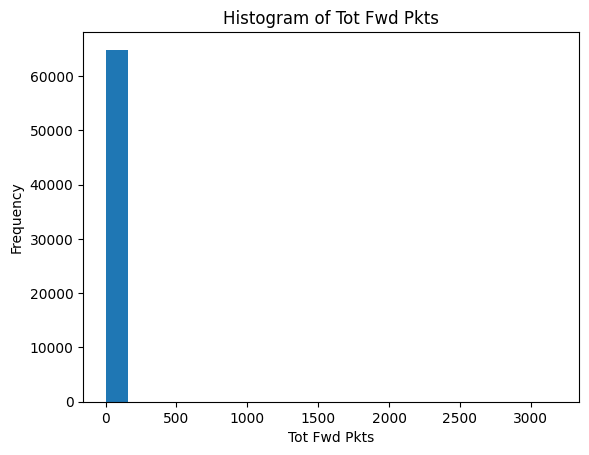

In [ ]:
# Histogram of Tot Fwd Pkts with 20 bins
plt.hist(data2['Tot Fwd Pkts'], bins=20)
plt.title('Histogram of Tot Fwd Pkts')
plt.xlabel('Tot Fwd Pkts')
plt.ylabel('Frequency')
plt.show()

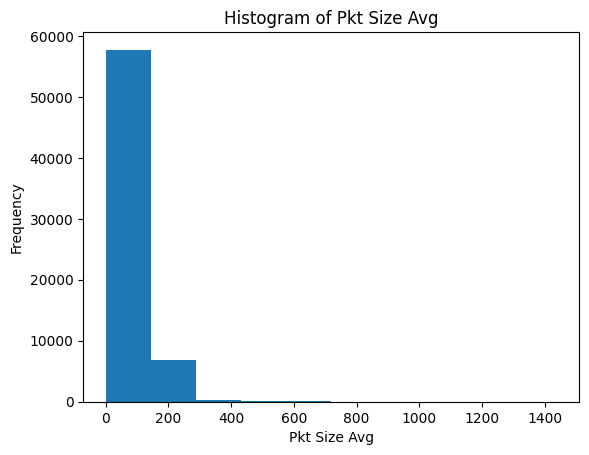

In [ ]:
# Histogram of Pkt Size Avg with 20 bins
plt.hist(data2['Pkt Size Avg'], bins=10)
plt.title('Histogram of Pkt Size Avg')
plt.xlabel('Pkt Size Avg')
plt.ylabel('Frequency')
plt.show()

<Axes: >

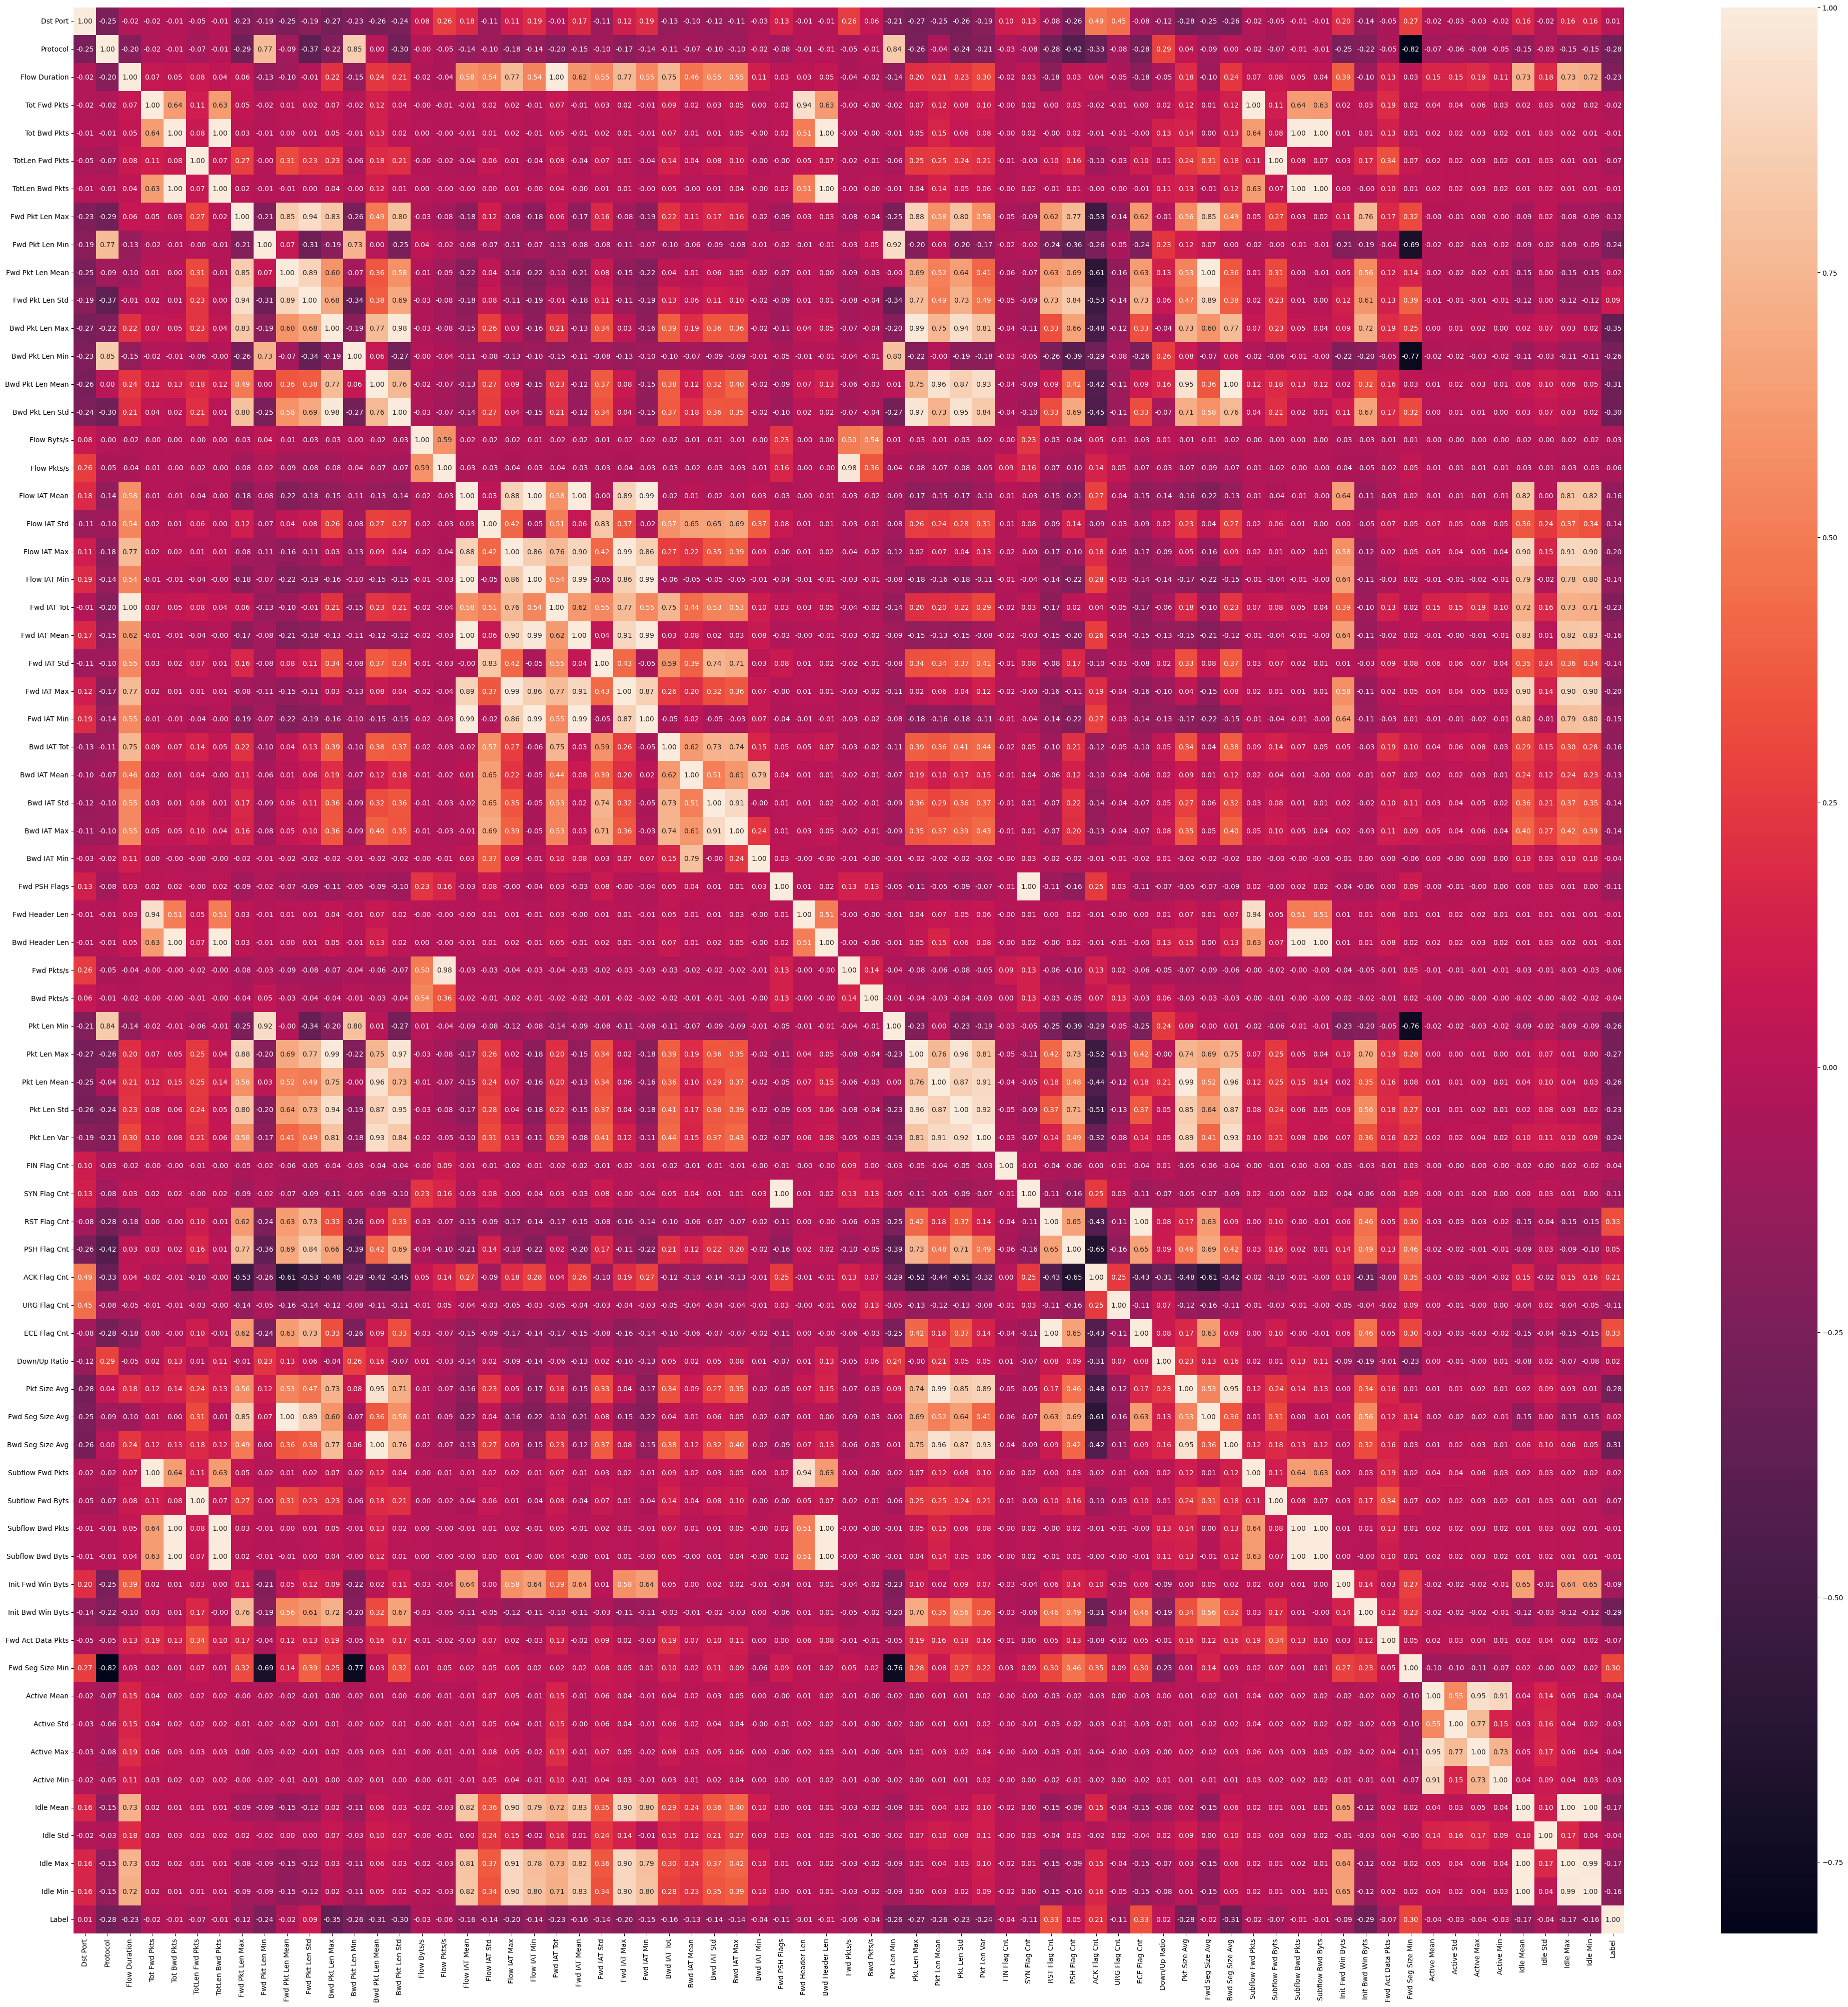

In [ ]:
# Heat map of correlations
plt.subplots(figsize=(50,50))
sns.heatmap(data2.corr(), annot=True, fmt=".2f")

In [ ]:
# Calculate the correlation matrix
corr_matrix = data2.corr().abs()

# Find features with correlation less than 0.7 in the label column
correlations = data2.corr()['Label']
high_corr_features = correlations[abs(correlations) > 0.7].index.tolist()

In [ ]:
# Drop the low correlation features
df_reduced = data2.drop(high_corr_features, axis=1)

# Print the correlation Matrix and the feature reduced data frame
print("\nCorrelation Matrix:\n", corr_matrix)


Correlation Matrix:
                    Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  \
Dst Port           1.000000  0.175737       0.139879      0.061638   
Protocol           0.175737  1.000000       0.003645      0.042040   
Flow Duration      0.139879  0.003645       1.000000      0.436893   
Tot Fwd Pkts       0.061638  0.042040       0.436893      1.000000   
Tot Bwd Pkts       0.045211  0.018521       0.261404      0.821648   
TotLen Fwd Pkts    0.065511  0.009227       0.152414      0.574913   
TotLen Bwd Pkts    0.013939  0.018820       0.078247      0.567245   
Fwd Pkt Len Max    0.171455  0.115927       0.027873      0.078554   
Fwd Pkt Len Min    0.152932  0.731298       0.007755      0.019201   
Fwd Pkt Len Mean   0.165241  0.029798       0.063367      0.015345   
Fwd Pkt Len Std    0.121793  0.172263       0.050403      0.018907   
Bwd Pkt Len Max    0.172431  0.017430       0.171673      0.139847   
Bwd Pkt Len Min    0.188408  0.794730       0.049814      0.027479  

In [ ]:
df_reduced.head()

Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0       443         6         141385             9             7   
1     49684         6            281             2             1   
2       443         6         279824            11            15   
3       443         6            132             2             0   
4       443         6         274016             9            13   

   TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
0              553             3773              202                0   
1               38                0               38                0   
2             1086            10527              385                0   
3                0                0                0                0   
4             1285             6141              517                0   

   Fwd Pkt Len Mean  Fwd Pkt Len Std  Bwd Pkt Len Max  Bwd Pkt Len Min  \
0         61.444444        87.534438             1460                0   
1              19.0        26.870058                0                0   
2         98.727273       129.392497             1460                0   
3               0.0              0.0                0                0   
4        142.777778       183.887722             1460                0   

   Bwd Pkt Len Mean  Bwd Pkt Len Std  Flow Byts/s  Flow Pkts/s  Flow IAT Mean  \
0             539.0       655.432936  30597.30523   113.166178    9425.666667   
1               0.0              0.0  135231.3167  10676.15658          140.5   
2             701.8       636.314186   41501.0864    92.915547       11192.96   
3               0.0              0.0          0.0  15151.51515          132.0   
4        472.384615       611.180489  27100.60726    80.287282    13048.38095   

   Flow IAT Std  Flow IAT Max  Flow IAT Min  Fwd IAT Tot  Fwd IAT Mean  \
0   19069.11685         73403             1       141385     17673.125   
1    174.655375           264            17          281         281.0   
2   24379.44834        112589             1       279728       27972.8   
3           0.0           132           132          132         132.0   
4   26311.62703        114077             1       273946      34243.25   

   Fwd IAT Std  Fwd IAT Max  Fwd IAT Min  Bwd IAT Tot  Bwd IAT Mean  \
0  23965.32327        73403           22        51417        8569.5   
1          0.0          281          281            0           0.0   
2  36167.74032       112589           94       258924   18494.57143   
3          0.0          132          132            0           0.0   
4  37996.56546       114077          201       252994   21082.83333   

   Bwd IAT Std  Bwd IAT Max  Bwd IAT Min  Fwd PSH Flags  Bwd PSH Flags  \
0  13036.89082        31525            1              0              0   
1          0.0            0            0              1              0   
2  36356.50372       133669            1              0              0   
3          0.0            0            0              0              0   
4  39075.73819       135611            1              0              0   

   Fwd URG Flags  Bwd URG Flags  Fwd Header Len  Bwd Header Len   Fwd Pkts/s  \
0              0              0             192             152    63.655975   
1              0              0              40              20  7117.437722   
2              0              0             232             312    39.310424   
3              0              0              40               0  15151.51515   
4              0              0             192             272    32.844797   

    Bwd Pkts/s  Pkt Len Min  Pkt Len Max  Pkt Len Mean  Pkt Len Std  \
0    49.510203            0         1460    254.470588   474.712955   
1  3558.718861            0           38          19.0     21.93931   
2    53.605123            0         1460    430.111111   566.234209   
3          0.0            0            0           0.0          0.0   
4    47.442485            0         1460    322.869565   497.254764   

In [ ]:
df = pd.DataFrame(df_reduced)

# Identify columns with only one unique value
columns_to_drop = [col for col in df.columns if df[col].nunique() == 1]

# Drop those columns
df_reduced = df.drop(columns=columns_to_drop)

print("Columns to drop:", columns_to_drop)
print("\nReduced DataFrame:\n", df_reduced.info())

Columns to drop: ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 68 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  Int64  
 1   Protocol           1048575 non-null  Int64  
 2   Flow Duration      1048575 non-null  Int64  
 3   Tot Fwd Pkts       1048575 non-null  Int64  
 4   Tot Bwd Pkts       1048575 non-null  Int64  
 5   TotLen Fwd Pkts    1048575 non-null  Int64  
 6   TotLen Bwd Pkts    1048575 non-null  Int64  
 7   Fwd Pkt Len Max    1048575 non-null  Int64  
 8   Fwd Pkt Len Min    1048575 non-null  Int64  
 9   Fwd Pkt Len Mean   1048575 non-null  Float64
 10  Fwd Pkt Len Std    1048575 non-null  Float64
 11  Bwd Pkt Len Max    1048575 non-nu

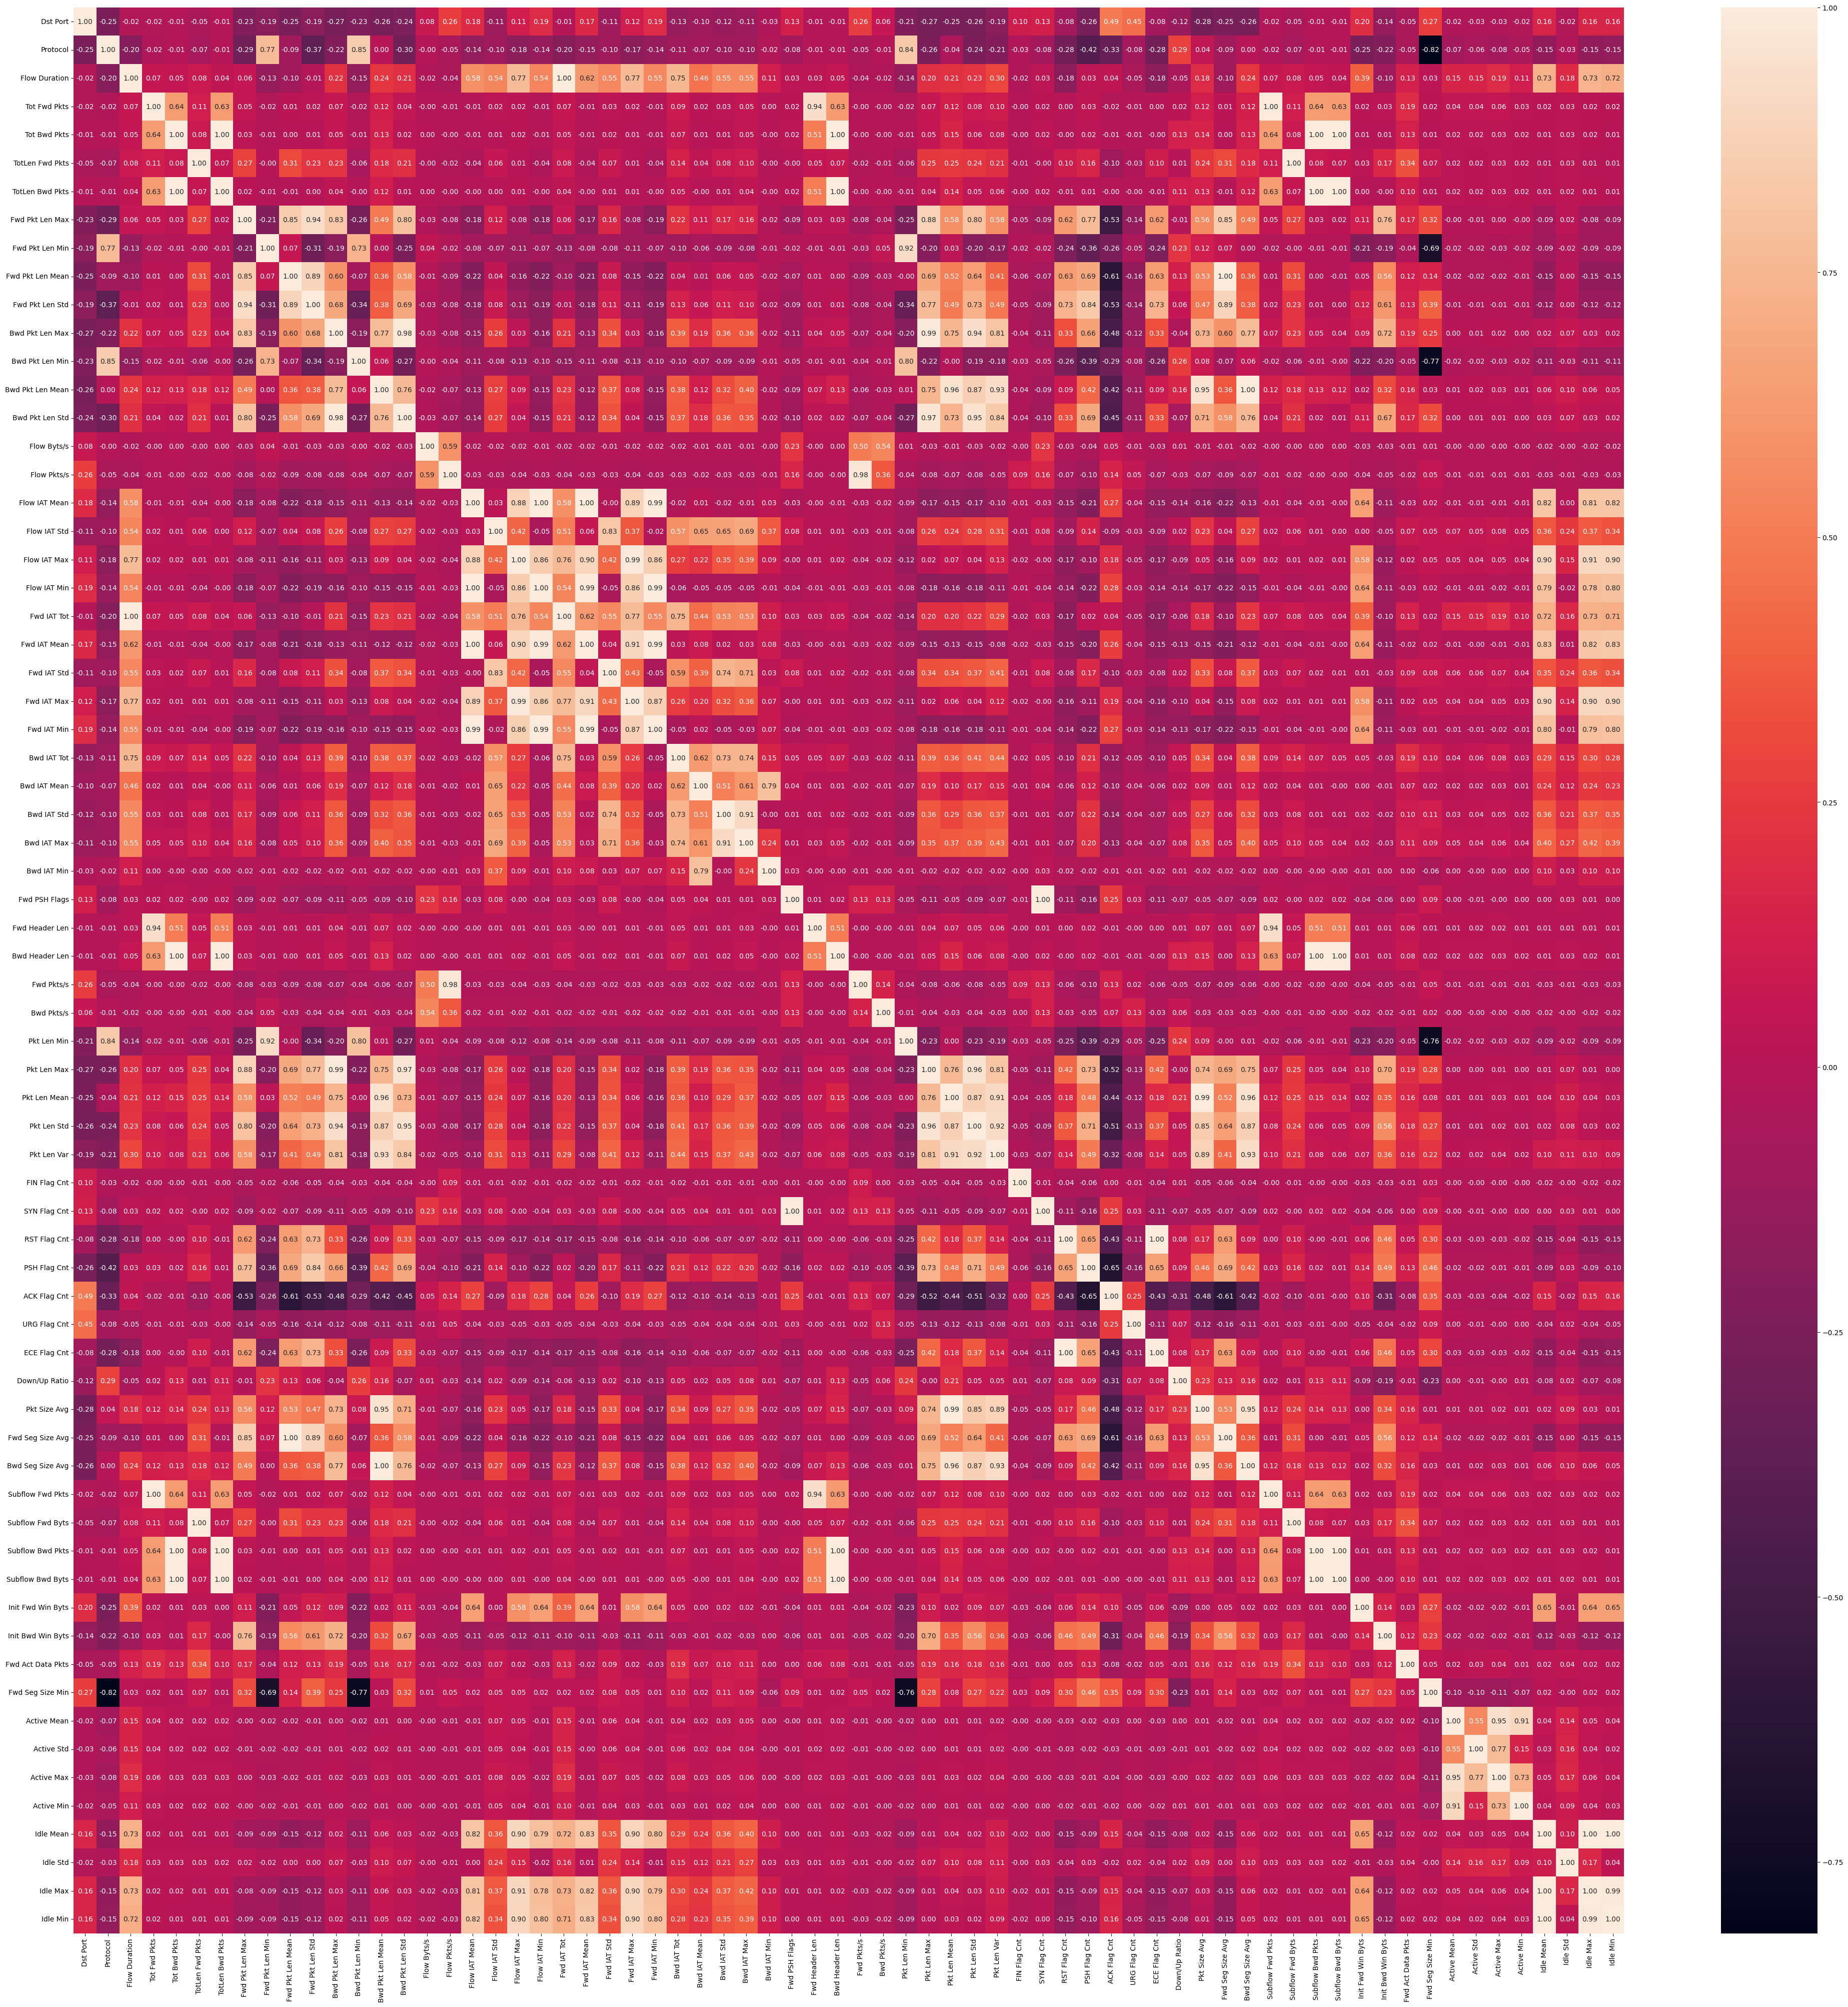

In [ ]:
# New Heat map of correlations with reduced features
plt.subplots(figsize=(50,50))
sns.heatmap(df_reduced.corr(), annot=True, fmt=".2f")
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(df_reduced)

# Understand the structure
print(df.info())
print(df.describe())

# Handling missing values
print(df.isnull().sum())

# Visualizing distributions
# Histogram
df['numerical_feature'].hist()
plt.title('Histogram of Numerical Feature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Box plot
sns.boxplot(x='categorical_feature', y='numerical_feature', data=df)
plt.title('Box Plot of Numerical Feature by Categorical Feature')
plt.show()

# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Handling missing data by imputation
df['numerical_feature'].fillna(df['numerical_feature'].mean(), inplace=True)

# Encoding categorical variables
df = pd.get_dummies(df, columns=['categorical_feature'])

# Feature Engineering example
df['new_feature'] = df['numerical_feature'] ** 2

# Feature Selection example
from sklearn.feature_selection import SelectKBest, f_classif
X = df.drop('target', axis=1)
y = df['target']
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64948 entries, 0 to 64947
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dst Port           64948 non-null  Int64  
 1   Protocol           64948 non-null  Int64  
 2   Flow Duration      64948 non-null  Int64  
 3   Tot Fwd Pkts       64948 non-null  Int64  
 4   TotLen Fwd Pkts    64948 non-null  Int64  
 5   Fwd Pkt Len Max    64948 non-null  Int64  
 6   Fwd Pkt Len Min    64948 non-null  Int64  
 7   Bwd Pkt Len Max    64948 non-null  Int64  
 8   Flow Byts/s        64900 non-null  Float64
 9   Flow Pkts/s        64948 non-null  Float64
 10  Flow IAT Mean      64948 non-null  Float64
 11  Flow IAT Std       64948 non-null  Float64
 12  Bwd IAT Mean       64948 non-null  Float64
 13  Fwd PSH Flags      64948 non-null  Int64  
 14  Bwd PSH Flags      64948 non-null  Int64  
 15  Fwd URG Flags      64948 non-null  Int64  
 16  Bwd URG Flags      649

KeyError: 'numerical_feature'

In [ ]:
# Count NaNs in each column
nan_count_per_column = data2.isna().sum()
print("NaNs per column:\n", nan_count_per_column)

NaNs per column:
 Dst Port             0
Protocol             0
Flow Duration        0
Tot Fwd Pkts         0
Tot Bwd Pkts         0
TotLen Fwd Pkts      0
TotLen Bwd Pkts      0
Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow IAT Mean        0
Flow IAT Std         0
Flow IAT Max         0
Flow IAT Min         0
Fwd IAT Tot          0
Fwd IAT Mean         0
Fwd IAT Std          0
Fwd IAT Max          0
Fwd IAT Min          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd PSH Flags        0
Fwd Header Len       0
Bwd Header Len       0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max          0
Pkt Len Mean         0
Pkt Len Std          0
Pkt Len Var          0
FIN Flag Cnt         0
SYN Flag Cnt         0
RST Flag Cnt         0
PSH Flag Cnt    

In [ ]:
# @title
# Check for infinite values in each column
inf_count_per_column = data2.select_dtypes(include=np.number).applymap(np.isinf).sum()
print("Infinite values per column:\n", inf_count_per_column)

Infinite values per column:
 Dst Port             0
Protocol             0
Flow Duration        0
Tot Fwd Pkts         0
Tot Bwd Pkts         0
TotLen Fwd Pkts      0
TotLen Bwd Pkts      0
Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow IAT Mean        0
Flow IAT Std         0
Flow IAT Max         0
Flow IAT Min         0
Fwd IAT Tot          0
Fwd IAT Mean         0
Fwd IAT Std          0
Fwd IAT Max          0
Fwd IAT Min          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd PSH Flags        0
Fwd Header Len       0
Bwd Header Len       0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max          0
Pkt Len Mean         0
Pkt Len Std          0
Pkt Len Var          0
FIN Flag Cnt         0
SYN Flag Cnt         0
RST Flag Cnt         0
PSH F

## Prepare Data

In [ ]:
# Define features and target variable
X = data2.drop('Label', axis=1)
y = data2['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train the Random Forest Model

In [ ]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Make Predictions

In [ ]:
# Make predictions
y_pred = rf.predict(X_test)

## Evaluate the Model

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9999713897886977
Confusion Matrix:
[[228762      0]
 [     9  85802]]
Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00    228762
         Bot       1.00      1.00      1.00     85811

    accuracy                           1.00    314573
   macro avg       1.00      1.00      1.00    314573
weighted avg       1.00      1.00      1.00    314573



## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8],
    'criterion': ['gini', 'entropy']
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

NameError: name 'rf' is not defined

## Retrain with Best Parameters

In [ ]:
# Initialize the Random Forest Classifier with best parameters
rf_best = RandomForestClassifier(**best_params, random_state=42)

# Train the model
rf_best.fit(X_train, y_train)

# Make predictions
y_pred_best = rf_best.predict(X_test)

# Evaluate the model
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print(f"Accuracy (Best): {accuracy_best}")
print("Confusion Matrix (Best):")
print(conf_matrix_best)
print("Classification Report (Best):")
print(class_report_best)